In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
data = pd.read_csv('owid-covid-data.csv')
print(data)


       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [5]:
# Checking columns
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Checking rows
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
# Identify missing values
data.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [8]:
# Select key columns for analysis
key_columns = ['date', 'location', 'continent', 'total_cases', 'new_cases',
               'total_deaths', 'new_deaths', 'total_vaccinations', 
               'people_vaccinated', 'people_fully_vaccinated',
               'population', 'life_expectancy', 'gdp_per_capita']
data = data[key_columns]
print(data)

              date     location continent  total_cases  new_cases  \
0       2020-01-03  Afghanistan      Asia          NaN        0.0   
1       2020-01-04  Afghanistan      Asia          NaN        0.0   
2       2020-01-05  Afghanistan      Asia          NaN        0.0   
3       2020-01-06  Afghanistan      Asia          NaN        0.0   
4       2020-01-07  Afghanistan      Asia          NaN        0.0   
...            ...          ...       ...          ...        ...   
350080  2023-10-14     Zimbabwe    Africa     265808.0        0.0   
350081  2023-10-15     Zimbabwe    Africa     265808.0        0.0   
350082  2023-10-16     Zimbabwe    Africa     265808.0        0.0   
350083  2023-10-17     Zimbabwe    Africa     265808.0        0.0   
350084  2023-10-18     Zimbabwe    Africa     265808.0        0.0   

        total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0                NaN         0.0                 NaN                NaN   
1                NaN 

In [9]:
# Filter for countries (remove continent aggregates)
countries_to_remove = ['World', 'European Union', 'Asia', 'Europe', 'Africa', 
                      'North America', 'South America', 'Oceania']
data = data[~data['location'].isin(countries_to_remove)]
print(data)


              date     location continent  total_cases  new_cases  \
0       2020-01-03  Afghanistan      Asia          NaN        0.0   
1       2020-01-04  Afghanistan      Asia          NaN        0.0   
2       2020-01-05  Afghanistan      Asia          NaN        0.0   
3       2020-01-06  Afghanistan      Asia          NaN        0.0   
4       2020-01-07  Afghanistan      Asia          NaN        0.0   
...            ...          ...       ...          ...        ...   
350080  2023-10-14     Zimbabwe    Africa     265808.0        0.0   
350081  2023-10-15     Zimbabwe    Africa     265808.0        0.0   
350082  2023-10-16     Zimbabwe    Africa     265808.0        0.0   
350083  2023-10-17     Zimbabwe    Africa     265808.0        0.0   
350084  2023-10-18     Zimbabwe    Africa     265808.0        0.0   

        total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0                NaN         0.0                 NaN                NaN   
1                NaN 

In [10]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

In [11]:
# Handle missing values - forward fill for time series data
data = data.sort_values(['location', 'date'])
data = data.groupby('location').apply(lambda x: x.ffill())


In [14]:
# Get the most recent data for each country
data = data.reset_index(drop=True)
latest_data = data.sort_values('date').groupby('location').last().reset_index()
print(latest_data)


              location       date continent  total_cases  new_cases  \
0          Afghanistan 2023-10-18      Asia     226816.0        0.0   
1              Albania 2023-10-18    Europe     334090.0        0.0   
2              Algeria 2023-10-18    Africa     271945.0        0.0   
3       American Samoa 2023-10-18   Oceania       8359.0        0.0   
4              Andorra 2023-10-18    Europe      48015.0        0.0   
..                 ...        ...       ...          ...        ...   
242  Wallis and Futuna 2023-10-18   Oceania       3550.0        0.0   
243     Western Sahara 2022-04-20    Africa          NaN        NaN   
244              Yemen 2023-10-18      Asia      11945.0        0.0   
245             Zambia 2023-10-18    Africa     349287.0        0.0   
246           Zimbabwe 2023-10-18    Africa     265808.0        0.0   

     total_deaths  new_deaths  total_vaccinations  people_vaccinated  \
0          7952.0         0.0          21763331.0         18293462.0   
1  

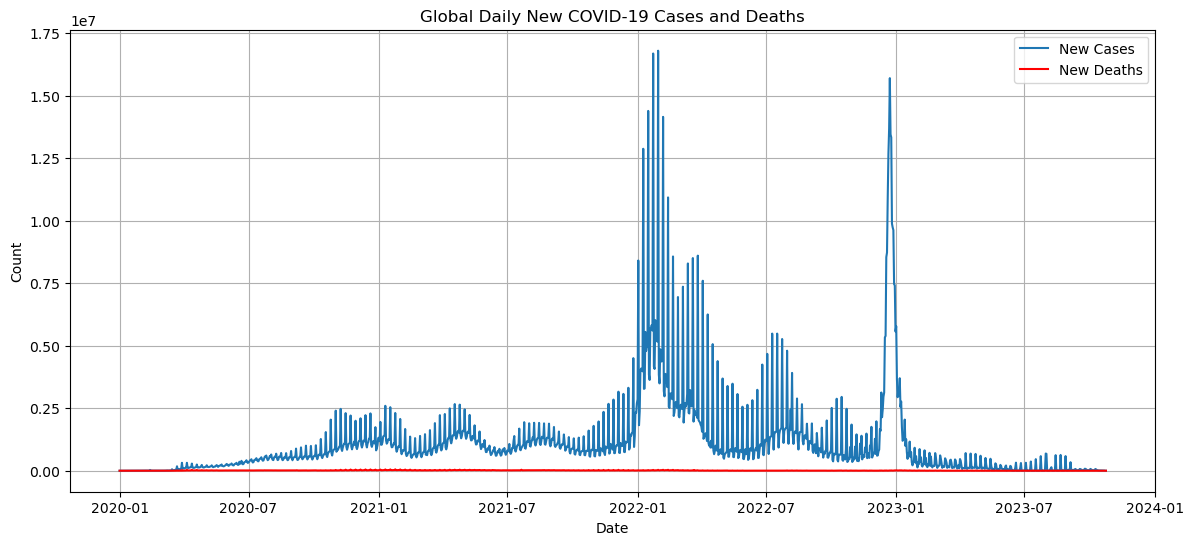

In [15]:
# Aggregate global cases by date
global_cases = data.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(global_cases['date'], global_cases['new_cases'], label='New Cases')
plt.plot(global_cases['date'], global_cases['new_deaths'], label='New Deaths', color='red')
plt.title('Global Daily New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

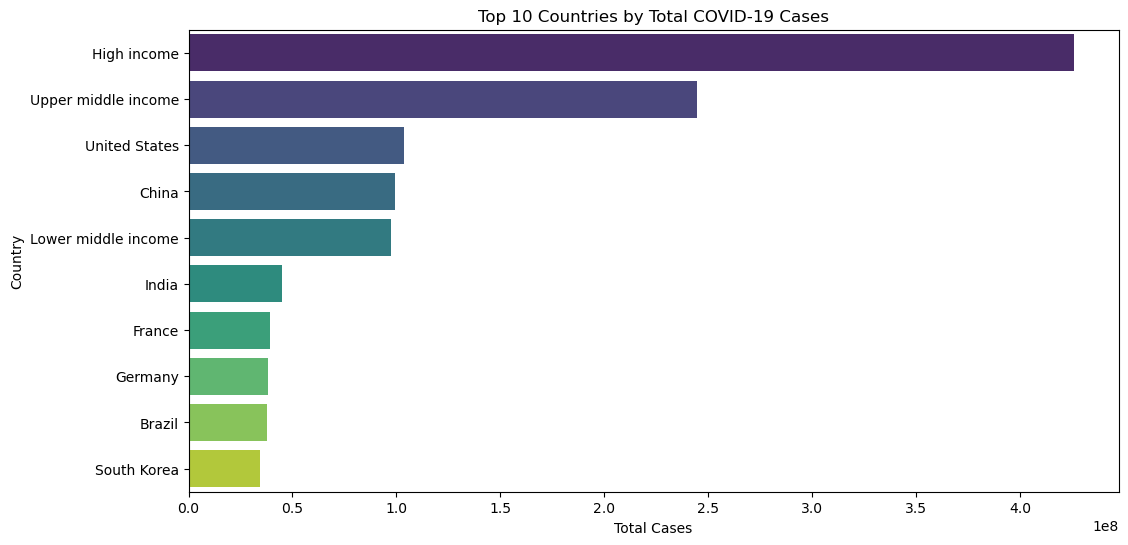

In [16]:
# Top 10 countries by Total Cases
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

In [18]:
latest_data = latest_data.copy()
latest_data = latest_data[(latest_data['total_cases'] > 0) & (latest_data['total_deaths'].notna())]
latest_data['case_fatality_rate'] = (latest_data['total_deaths'] / latest_data['total_cases']) * 100


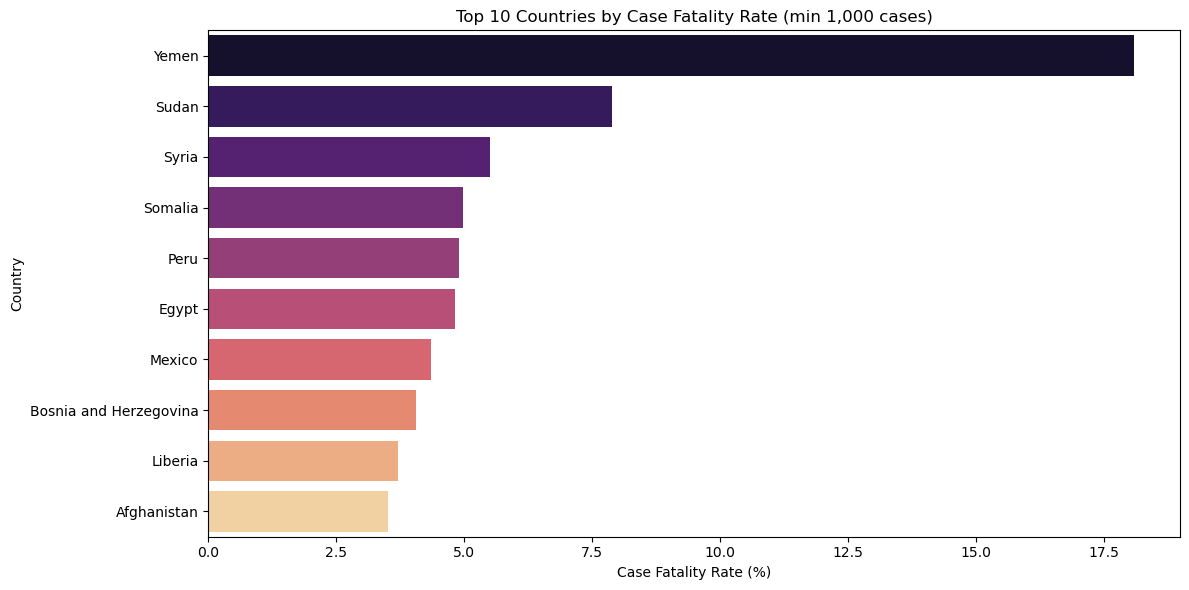

In [19]:
# Countries with at least 1,000 cases
cfr_data = latest_data[latest_data['total_cases'] > 1000].sort_values('case_fatality_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='case_fatality_rate', y='location', data=cfr_data, palette='magma')
plt.title('Top 10 Countries by Case Fatality Rate (min 1,000 cases)')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


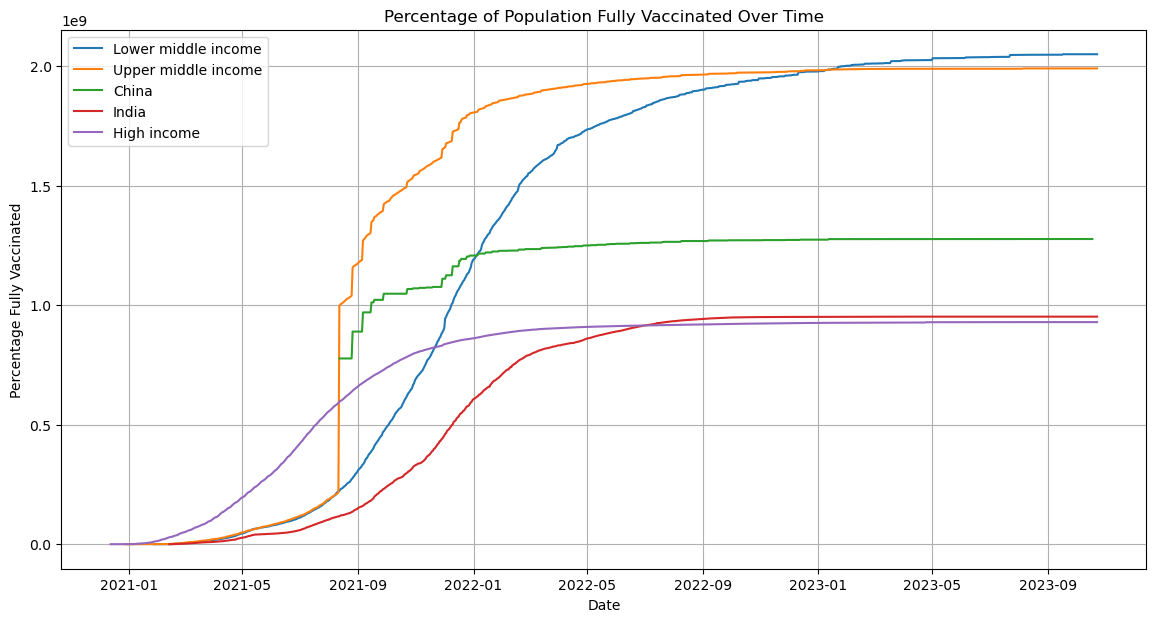

In [22]:
# Top 5 countries by vaccination rate
top_vaccinated = latest_data.sort_values('people_fully_vaccinated', ascending=False).head(5)['location'].tolist()

vaccine_progress = data[data['location'].isin(top_vaccinated)]

plt.figure(figsize=(14, 7))
for country in top_vaccinated:
    country_data = vaccine_progress[vaccine_progress['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated'], label=country)

plt.title('Percentage of Population Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Fully Vaccinated')
plt.legend()
plt.grid(True)
plt.show()

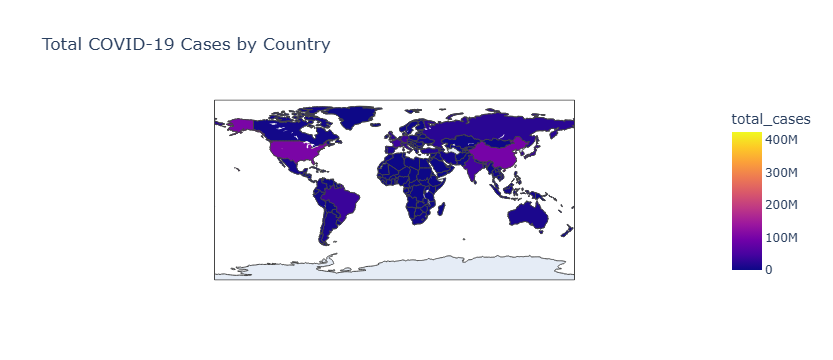

In [25]:
import plotly.express as px

# Create choropleth of cases per million
fig = px.choropleth(latest_data,
                    locations="location",
                    locationmode='country names',
                    color="total_cases",
                    hover_name="location",
                    hover_data=["total_deaths", "people_fully_vaccinated"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases by Country")
fig.show()


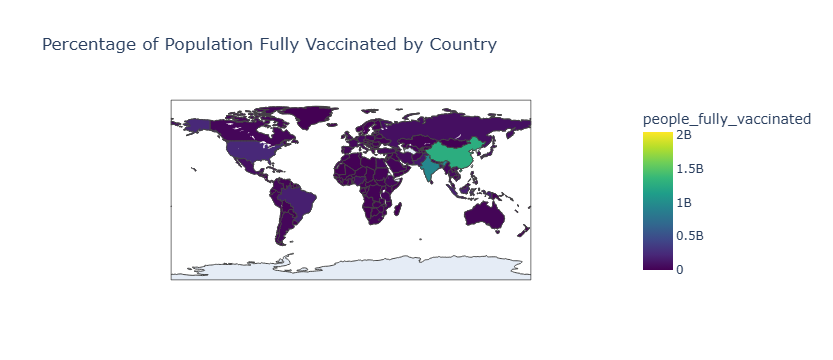

In [26]:
# Create choropleth of vaccination rates
fig = px.choropleth(latest_data,
                    locations="location",
                    locationmode='country names',
                    color="people_fully_vaccinated",
                    hover_name="location",
                    hover_data=["total_cases", "total_deaths"],
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Percentage of Population Fully Vaccinated by Country")
fig.show()

In [ ]:
# INSIGHTS
#  The data shows distinct waves of COVID-19 cases globally, with peaks corresponding to the emergence of new variants.
#  Certain regions (like Europe and North America) experienced earlier and more severe outbreaks compared to others, though vaccination rates are now highest in these regions.
# The analysis is limited by inconsistent testing and reporting practices across countries, particularly in the early stages of the pandemic.